In [159]:
#importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from seaborn import heatmap, pairplot

#importing data preprocessing libraries
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

#import models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#importing outcome techniques
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [219]:
asteriod = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\nasa - nasa.csv")
asteriod

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2457708.228,304.306024,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2458087.617,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501181,...,37.026468,690.054279,0.965760,274.692712,2.090708,2458300.480,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802909,662.048343,1.185467,180.346090,1.787733,2458288.261,203.524965,0.543767,J2000,False


# ***Data Visualization & Analysis***

In [220]:
asteriod.shape
# Columns: 40
# Rows: 4687

(4687, 40)

In [178]:
asteriod.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [221]:
#Droping Columns
asteriod .drop(['Neo Reference ID', 'Name', 'Close Approach Date', 'Epoch Date Close Approach', 'Orbit ID', 'Orbit Determination Date','Equinox','Orbiting Body'], axis = 1, inplace = True)
asteriod .columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous'],
      dtype='object')

### Handle Null values

In [180]:
asteriod.isnull().sum()
#No missing values to handle

Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Time                 0
Mean Anomaly  

### Dist-Plot

In [181]:
# The columns with numerical values
asteriod.select_dtypes(include=np.number).columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion'],
      dtype='object')

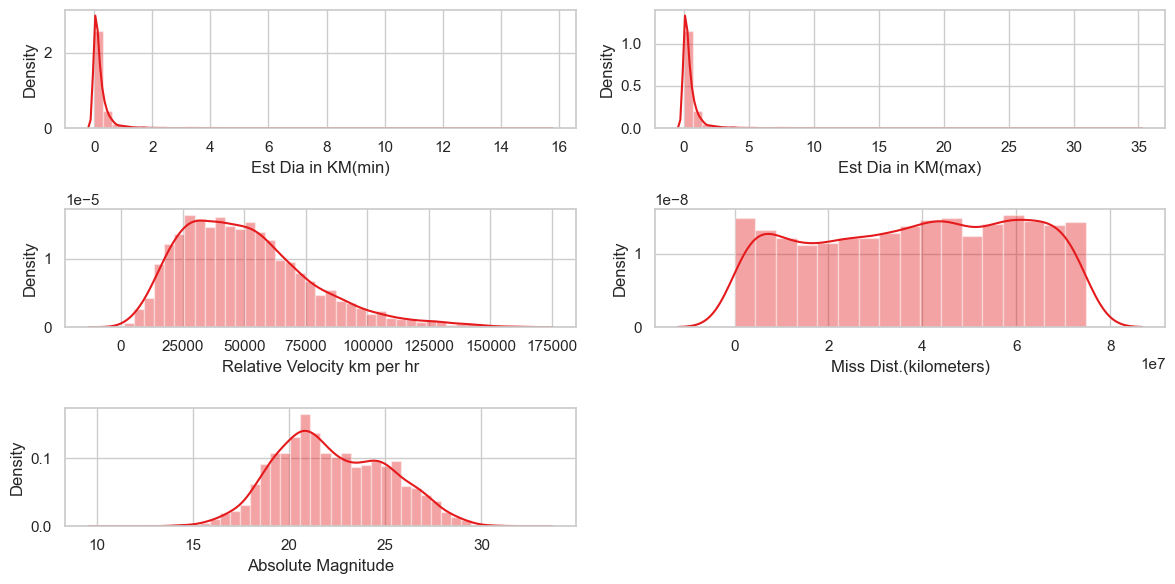

In [182]:
distPlotColumns=['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Relative Velocity km per hr',
       'Miss Dist.(kilometers)', 'Absolute Magnitude']

rows=3
cols=2
counter=1
plt.rcParams['figure.figsize']=[12,6]
for i in distPlotColumns:
    plt.subplot(rows,cols,counter)
    sns.distplot(asteriod[i])
    counter+=1
plt.tight_layout()
plt.show()

### Box-Plot

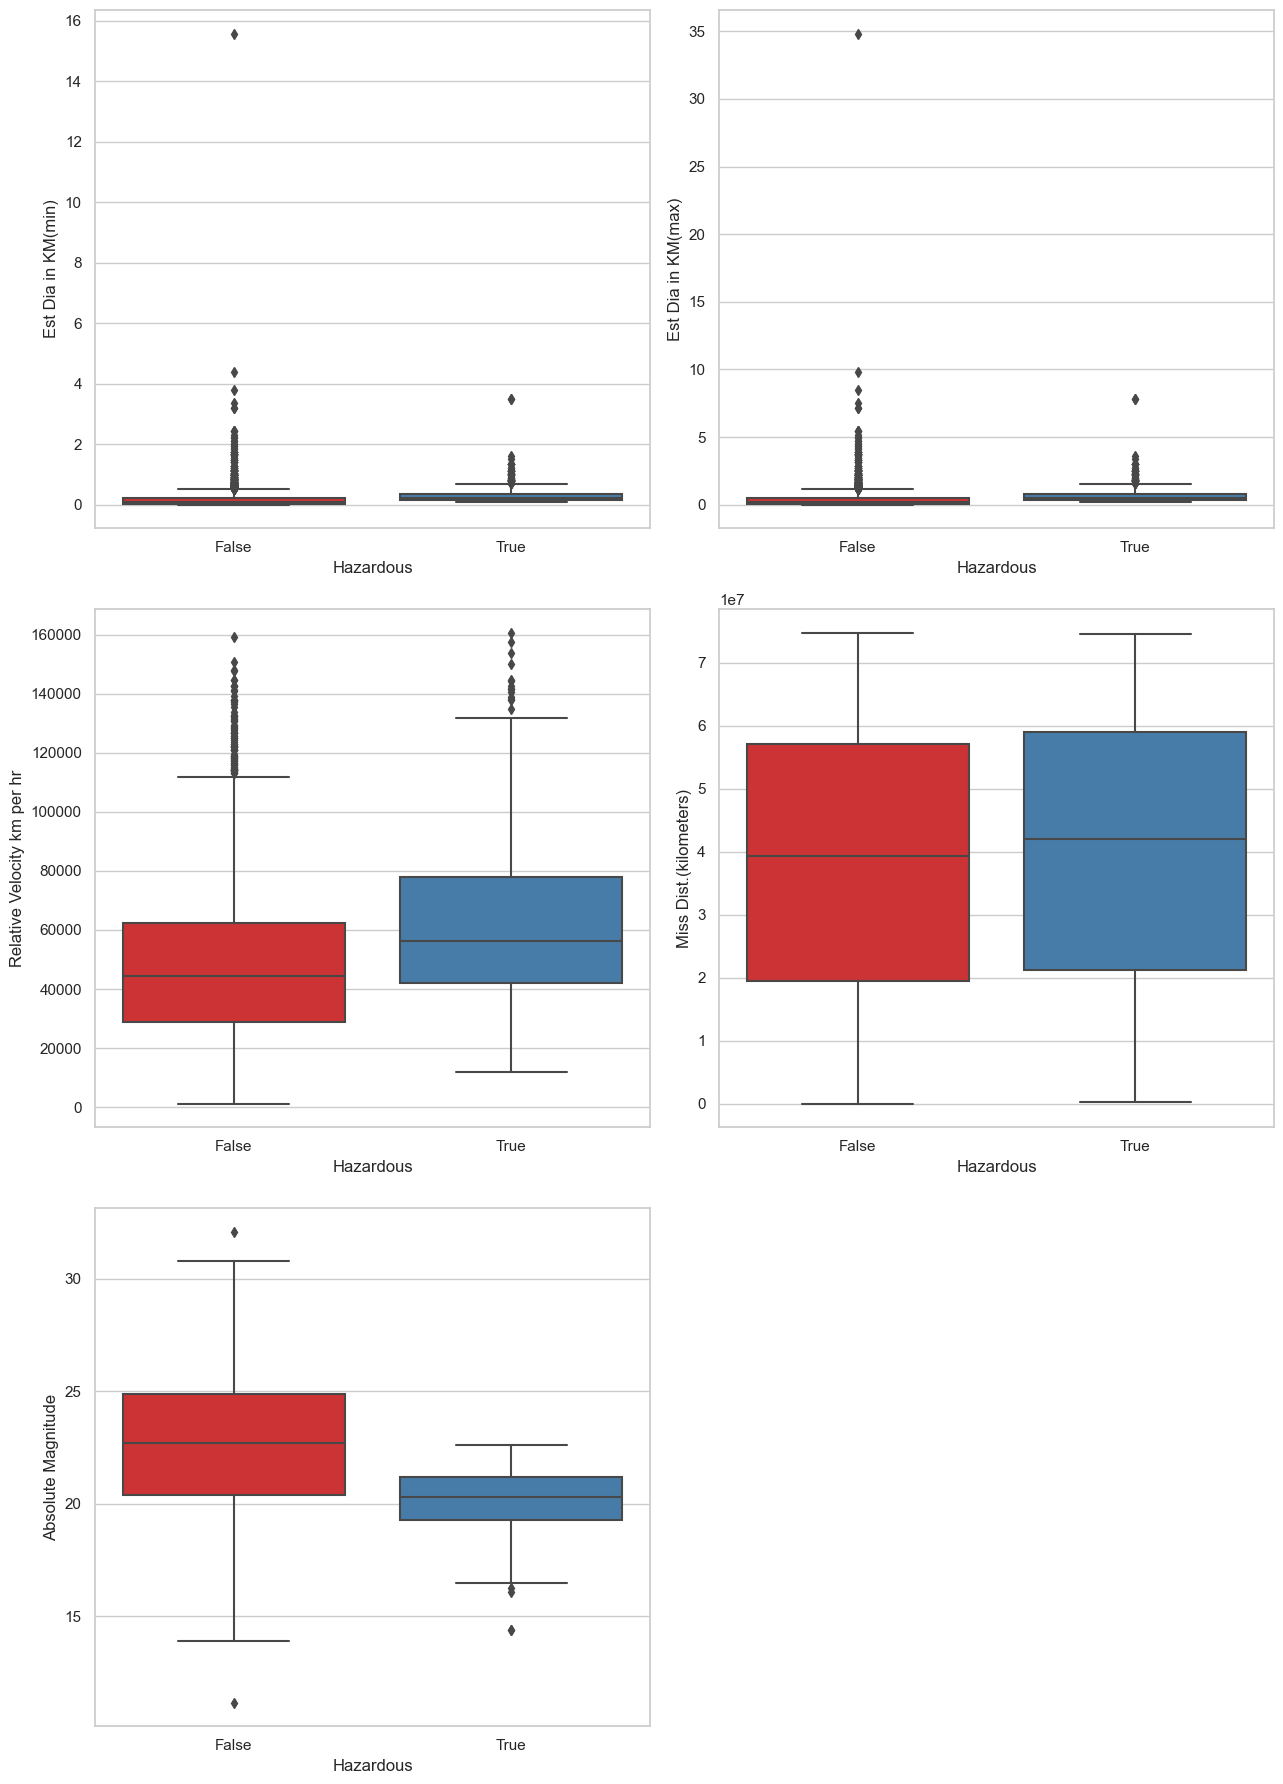

In [183]:
boxPlotColumns=['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Relative Velocity km per hr',
       'Miss Dist.(kilometers)', 'Absolute Magnitude']

rows=3
cols=2
counter=1
plt.rcParams['figure.figsize']=[13, 18]
sns.set(style="whitegrid")
sns.set_palette("Set1")

for i in boxPlotColumns:
    plt.subplot(rows,cols,counter)
    sns.boxplot(data=asteriod, x='Hazardous', y=asteriod[i])
    counter+=1
plt.tight_layout()
plt.show()

<Axes: >

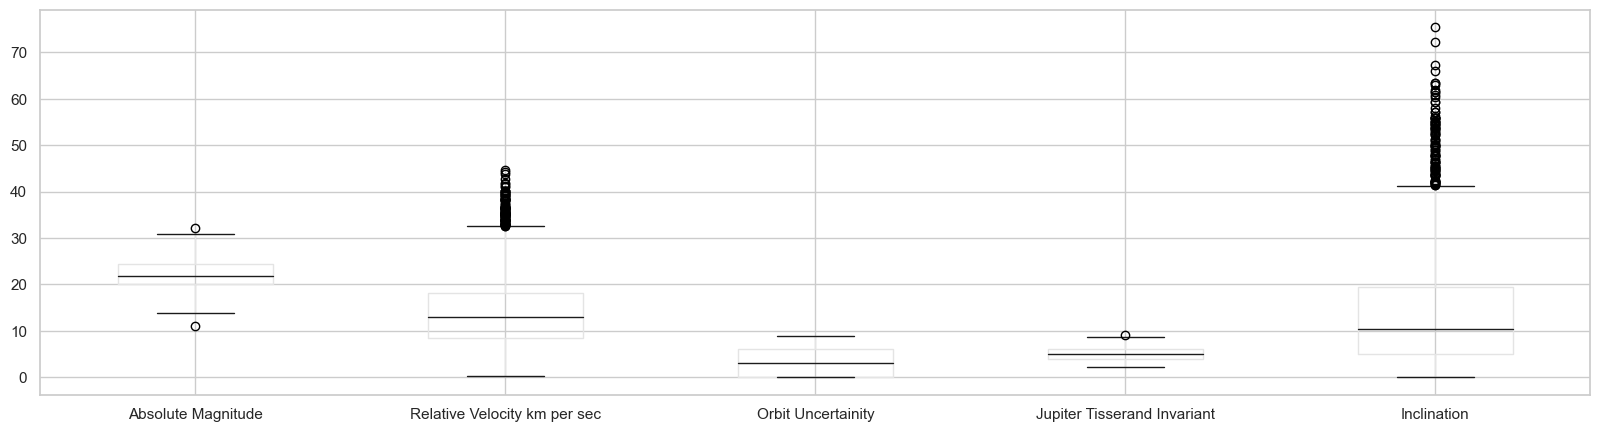

In [184]:
plt.figure(figsize = (20,5))
asteriod.boxplot(column = ['Absolute Magnitude', 'Relative Velocity km per sec', 'Orbit Uncertainity', 'Jupiter Tisserand Invariant', 'Inclination'])

<Axes: >

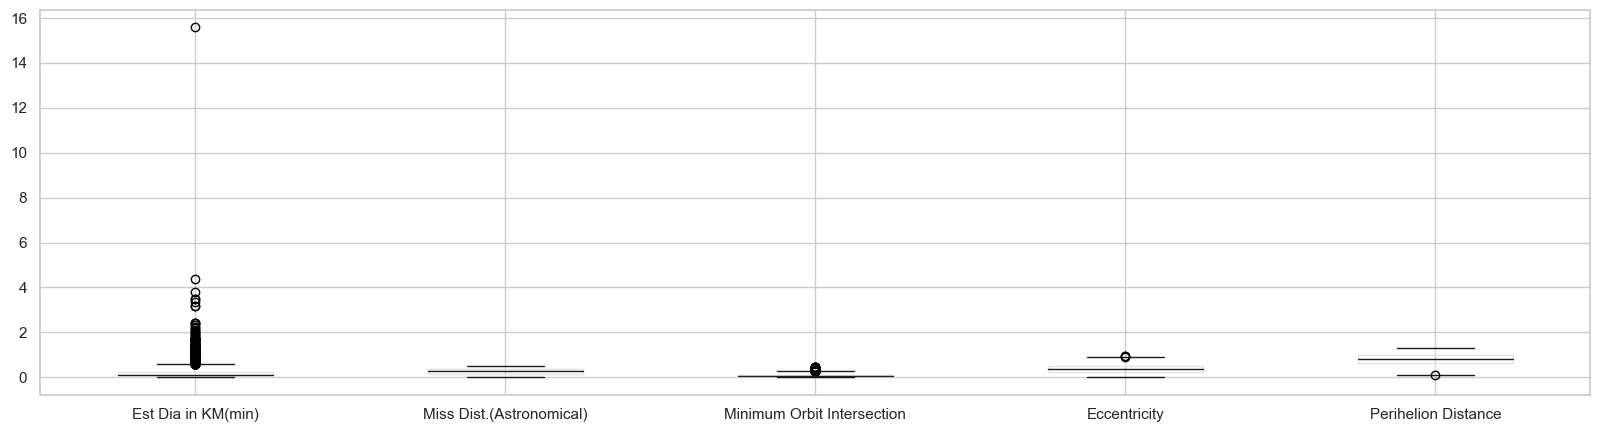

In [185]:
plt.figure(figsize = (20,5))
asteriod.boxplot(column = ['Est Dia in KM(min)', 'Miss Dist.(Astronomical)', 'Minimum Orbit Intersection', 'Eccentricity', 'Perihelion Distance'])

<Axes: >

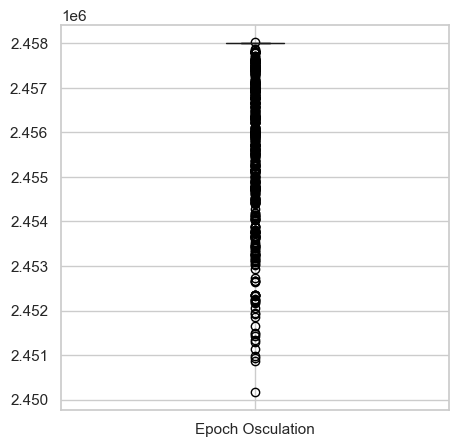

In [186]:
plt.figure(figsize = (5,5))
asteriod.boxplot(column = ['Epoch Osculation'])

<Axes: >

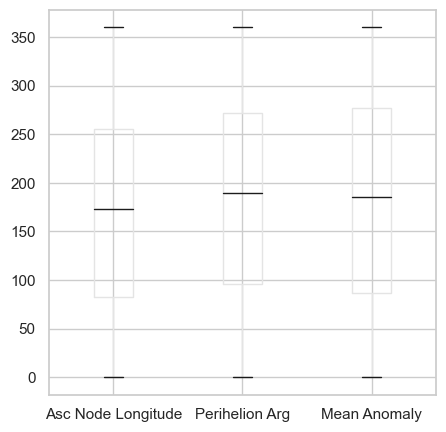

In [187]:
plt.figure(figsize = (5,5))
asteriod.boxplot(column = ['Asc Node Longitude', 'Perihelion Arg', 'Mean Anomaly'])

In [188]:
asteriod[asteriod.columns[:len(asteriod.columns)-1]] = RobustScaler().fit_transform(asteriod[asteriod.columns[:len(asteriod.columns)-1]])
asteriod.head(5)

<IPython.core.display.Javascript object>

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,-0.068182,0.074491,0.074491,0.074491,0.074491,0.074491,0.074491,0.074491,0.074491,-0.705257,...,-0.294574,0.824380,0.244178,-0.067943,-0.752217,0.327031,0.644396,0.417458,-0.230333,True
1,-0.136364,0.160019,0.160019,0.160019,0.160019,0.160019,0.160019,0.160019,0.160019,0.538747,...,1.244122,-0.208834,-0.184507,-0.313743,0.700137,-0.101967,-0.606604,-0.063199,0.249132,False
2,-0.363636,0.547695,0.547695,0.547695,0.547695,0.547695,0.547695,0.547695,0.547695,-0.552338,...,-0.417467,0.505105,0.323462,0.321072,0.332971,0.294201,0.503920,0.565491,-0.289011,True
3,1.250000,-0.462859,-0.462859,-0.462859,-0.462859,-0.462859,-0.462859,-0.462859,-0.462859,-0.180825,...,-0.165364,-0.671445,0.021314,0.411441,-0.971061,-0.076187,-0.240290,-0.617216,-0.023841,False
4,-0.068182,0.074491,0.074491,0.074491,0.074491,0.074491,0.074491,0.074491,0.074491,-0.319039,...,0.445487,-0.511767,-0.021814,0.367185,-0.178812,-0.113620,-0.540122,-0.266861,0.025311,True


### Data Imbalance

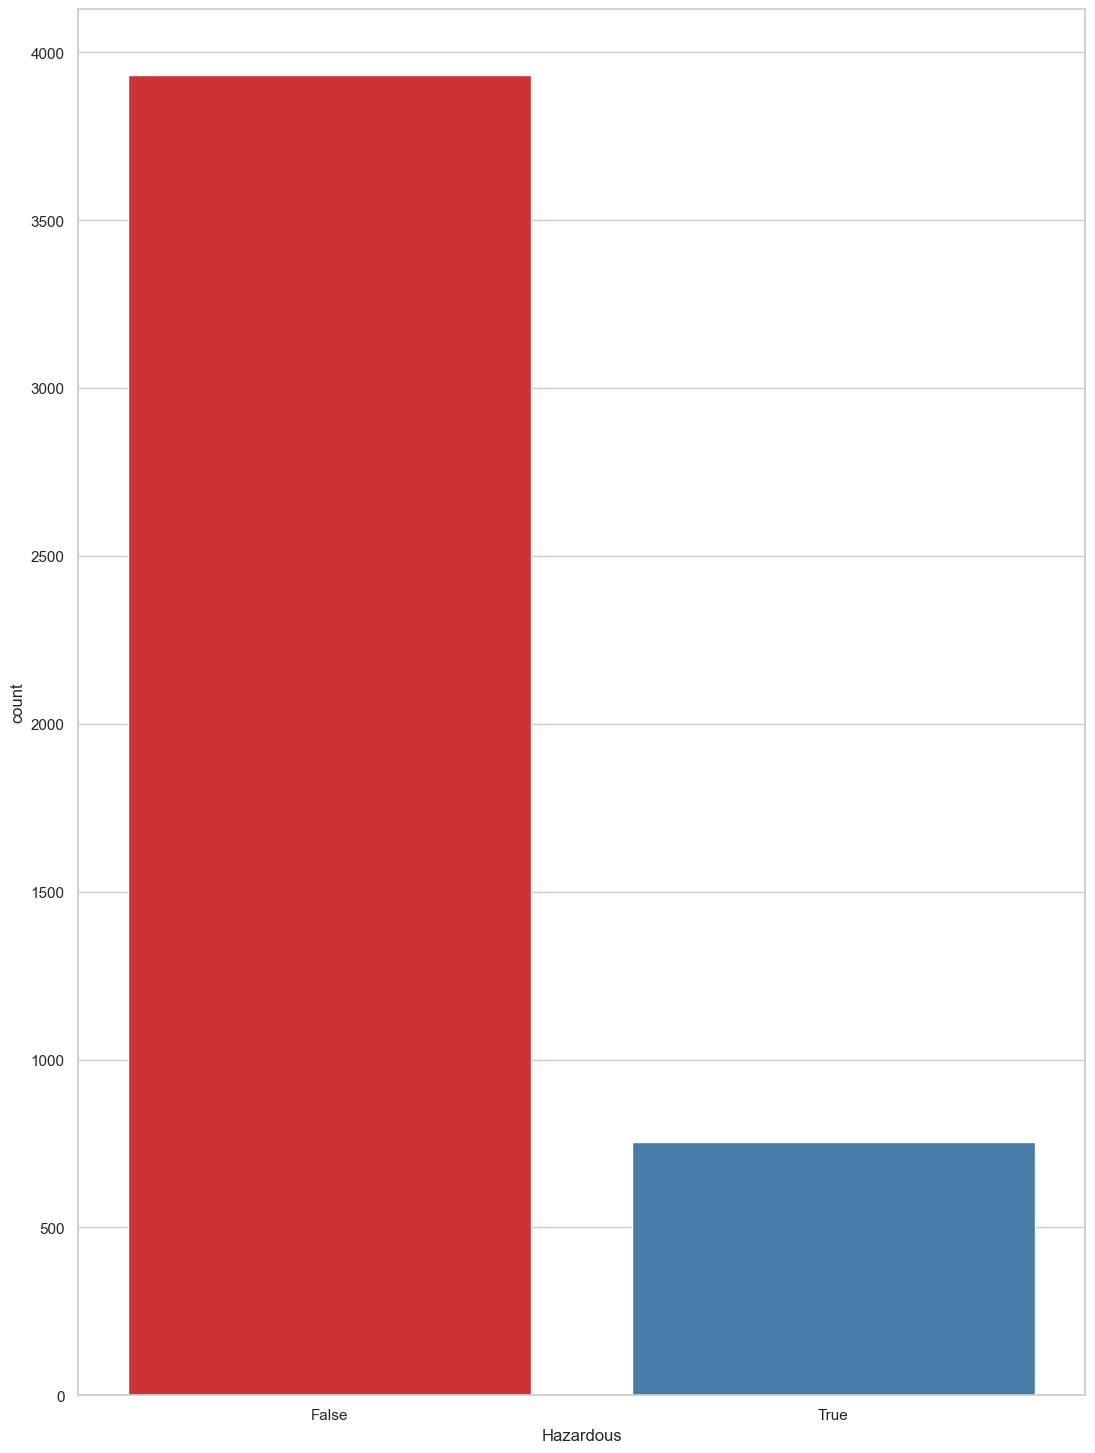

In [189]:
sns.countplot(x='Hazardous',data=asteriod)
plt.show()

# ***Data Pre-processing***

### Encode categorical features

In [190]:
asteriod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Est Dia in M(min)             4687 non-null   float64
 4   Est Dia in M(max)             4687 non-null   float64
 5   Est Dia in Miles(min)         4687 non-null   float64
 6   Est Dia in Miles(max)         4687 non-null   float64
 7   Est Dia in Feet(min)          4687 non-null   float64
 8   Est Dia in Feet(max)          4687 non-null   float64
 9   Relative Velocity km per sec  4687 non-null   float64
 10  Relative Velocity km per hr   4687 non-null   float64
 11  Miles per hour                4687 non-null   float64
 12  Miss Dist.(Astronomical)      4687 non-null   float64
 13  Mis

In [191]:
asteriod['Hazardous'].unique()

array([ True, False])

In [192]:
enc = LabelEncoder()

asteriod['Hazardous'] = enc.fit_transform(asteriod['Hazardous'])

asteriod

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,-0.068182,0.074491,0.074491,0.074491,0.074491,0.074491,0.074491,0.074491,0.074491,-0.705257,...,-0.294574,0.824380,0.244178,-0.067943,-0.752217,0.327031,0.644396,0.417458,-0.230333,1
1,-0.136364,0.160019,0.160019,0.160019,0.160019,0.160019,0.160019,0.160019,0.160019,0.538747,...,1.244122,-0.208834,-0.184507,-0.313743,0.700137,-0.101967,-0.606604,-0.063199,0.249132,0
2,-0.363636,0.547695,0.547695,0.547695,0.547695,0.547695,0.547695,0.547695,0.547695,-0.552338,...,-0.417467,0.505105,0.323462,0.321072,0.332971,0.294201,0.503920,0.565491,-0.289011,1
3,1.250000,-0.462859,-0.462859,-0.462859,-0.462859,-0.462859,-0.462859,-0.462859,-0.462859,-0.180825,...,-0.165364,-0.671445,0.021314,0.411441,-0.971061,-0.076187,-0.240290,-0.617216,-0.023841,0
4,-0.068182,0.074491,0.074491,0.074491,0.074491,0.074491,0.074491,0.074491,0.074491,-0.319039,...,0.445487,-0.511767,-0.021814,0.367185,-0.178812,-0.113620,-0.540122,-0.266861,0.025311,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,0.454545,-0.302630,-0.302630,-0.302630,-0.302630,-0.302630,-0.302630,-0.302630,-0.302630,0.957655,...,2.032302,-0.049097,-0.111452,-0.249990,0.491815,-0.031133,-0.902543,0.625707,0.140183,0
4683,1.431818,-0.475167,-0.475167,-0.475167,-0.475167,-0.475167,-0.475167,-0.475167,-0.475167,-1.004972,...,-0.340331,1.003804,-0.228100,0.445647,-0.838202,-0.391828,0.391840,0.513177,0.322126,0
4684,0.181818,-0.154947,-0.154947,-0.154947,-0.154947,-0.154947,-0.154947,-0.154947,-0.154947,-0.593714,...,-0.405954,-0.788615,0.431897,0.361928,0.482147,0.398707,1.118078,0.093825,-0.359907,0
4685,-0.022727,0.023696,0.023696,0.023696,0.023696,0.023696,0.023696,0.023696,0.023696,-0.162347,...,0.740130,-0.051310,0.366552,0.961577,-0.053451,0.143057,1.076389,0.093951,-0.318376,0


### Data Normalization

In [193]:
import numpy as np
from scipy import stats

Column_Names=['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Relative Velocity km per hr', 'Miss Dist.(kilometers)', 'Absolute Magnitude']

for col_name in Column_Names:
    positive_values = asteriod[col_name] + np.abs(np.min(asteriod[col_name])) + 1e-6
    asteriod[col_name], _ = stats.boxcox(positive_values)

print(asteriod)


      Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)   
0               1.176916           -0.543288           -0.543288  \
1               1.124878           -0.410228           -0.410228   
2               0.947750            0.044979            0.044979   
3               2.106353           -2.875861           -2.875861   
4               1.176916           -0.543288           -0.543288   
...                  ...                 ...                 ...   
4682            1.561319           -1.514808           -1.514808   
4683            2.225452           -3.184034           -3.184034   
4684            1.363799           -1.018168           -1.018168   
4685            1.211344           -0.631128           -0.631128   
4686            0.728505            0.611867            0.611867   

      Est Dia in M(min)  Est Dia in M(max)  Est Dia in Miles(min)   
0              0.074491           0.074491               0.074491  \
1              0.160019           0.160019   

**Box-Cox Transformation Formula:**



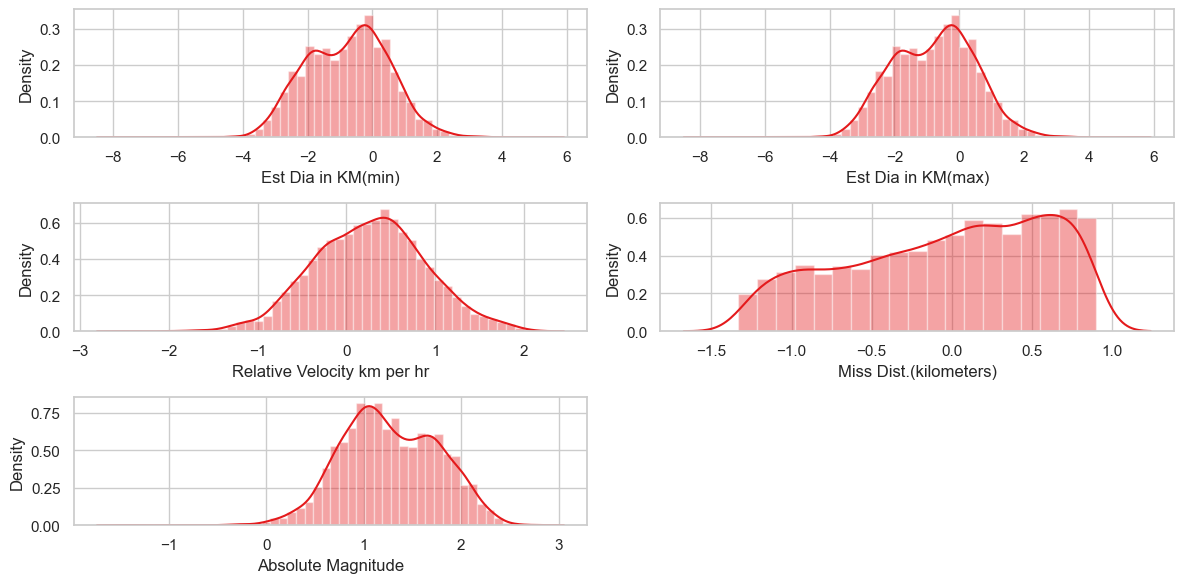

In [194]:
distPlotColumns=['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Relative Velocity km per hr',
       'Miss Dist.(kilometers)', 'Absolute Magnitude']
rows=3
cols=2
counter=1
plt.rcParams['figure.figsize']=[12,6]
for i in distPlotColumns:
    plt.subplot(rows,cols,counter)
    sns.distplot(asteriod[i])
    counter+=1
plt.tight_layout()
plt.show()

In [223]:
asteriods=pd.read_csv("C:\\Users\\Srinivas\\Downloads\\nasa - nasa.csv")

In [224]:
# Top 3 Largest Asteroids (in terms of Estimated Maximum Diameter)
eda_maxL = asteriods.sort_values('Est Dia in KM(max)', ascending=False).head(3)
eda_maxL

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
1716,2000433,2000433,11.16,15.579552,34.836938,15579.552410,34836.938250,9.680682,21.646663,51114.01874,...,304.322163,642.995474,1.133419,178.816591,1.782461,2457873.186,71.280278,0.559880,J2000,False
373,2001980,2001980,13.92,4.370740,9.773272,4370.740040,9773.271842,2.715851,6.072828,14339.69875,...,246.574315,816.359387,1.085815,115.485874,2.333076,2458071.714,328.595687,0.440982,J2000,False
4467,2001685,2001685,14.23,3.789265,8.473054,3789.264984,8473.054089,2.354539,5.264910,12431.97213,...,274.341995,583.865635,0.771233,127.072787,1.963026,2454441.626,18.419869,0.616580,J2000,False


In [225]:
#ASTERIOD SIZE:
eda_minL = asteriods.sort_values('Est Dia in KM(min)', ascending=False).head(3)
eda_minL

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
1716,2000433,2000433,11.16,15.579552,34.836938,15579.552410,34836.938250,9.680682,21.646663,51114.01874,...,304.322163,642.995474,1.133419,178.816591,1.782461,2457873.186,71.280278,0.559880,J2000,False
373,2001980,2001980,13.92,4.370740,9.773272,4370.740040,9773.271842,2.715851,6.072828,14339.69875,...,246.574315,816.359387,1.085815,115.485874,2.333076,2458071.714,328.595687,0.440982,J2000,False
4467,2001685,2001685,14.23,3.789265,8.473054,3789.264984,8473.054089,2.354539,5.264910,12431.97213,...,274.341995,583.865635,0.771233,127.072787,1.963026,2454441.626,18.419869,0.616580,J2000,False


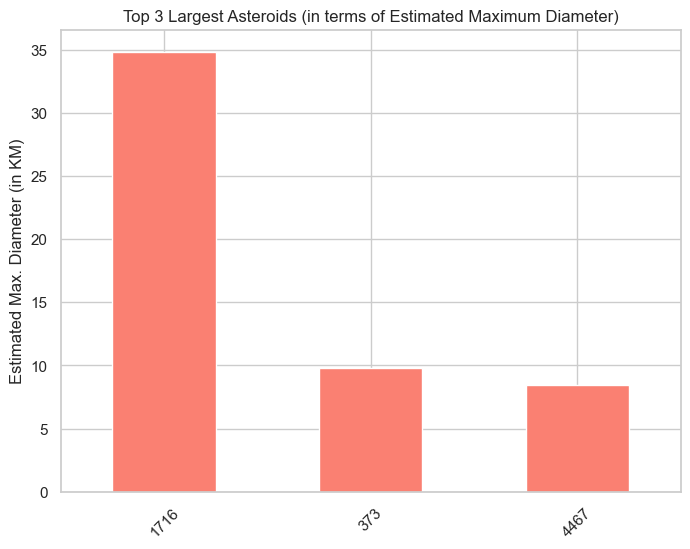

In [226]:
eda_maxL['Est Dia in KM(max)'].plot(kind='bar', ylabel='Estimated Max. Diameter (in KM)', color='salmon')
plt.title('Top 3 Largest Asteroids (in terms of Estimated Maximum Diameter)')
plt.xticks(rotation=45)
plt.show()


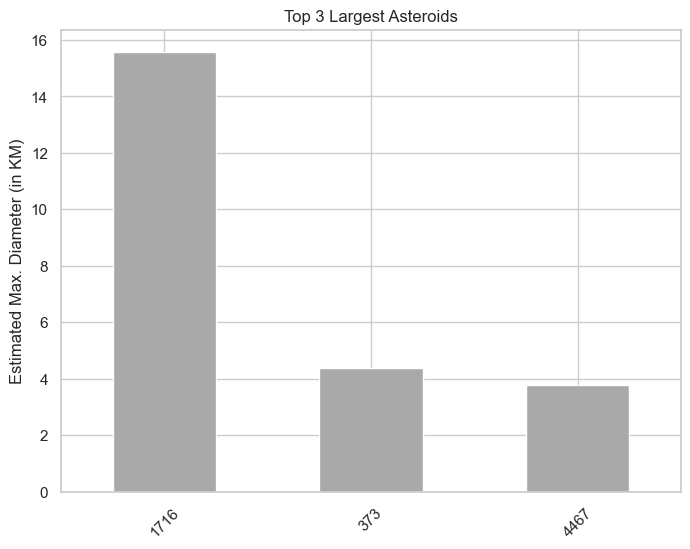

In [227]:
eda_minL['Est Dia in KM(min)'].plot(kind='bar', ylabel='Estimated Max. Diameter (in KM)', color='darkgray')
plt.title('Top 3 Largest Asteroids')
plt.xticks(rotation=45)
plt.show()

In [228]:
# Top 3 Smallest Asteroids (in terms of Estimated Maximum Diameter)
eda_maxS = asteriods.sort_values('Est Dia in KM(max)', ascending=True).head(3)
eda_maxS

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
2501,3432678,3432678,32.1,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,208.941651,1303.673637,0.741795,111.873833,3.929210,2454719.649,11.556837,0.276143,J2000,False
2219,3770280,3770280,30.8,0.001839,0.004112,1.838887,4.111876,0.001143,0.002555,6.033093,...,161.849982,814.517857,0.682237,80.374339,2.731511,2457862.779,60.869921,0.441979,J2000,False
4570,3733862,3733862,30.6,0.002016,0.004509,2.016299,4.508582,0.001253,0.002802,6.615155,...,224.536347,330.166255,0.833861,49.798656,1.035900,2457884.233,126.773044,1.090360,J2000,False


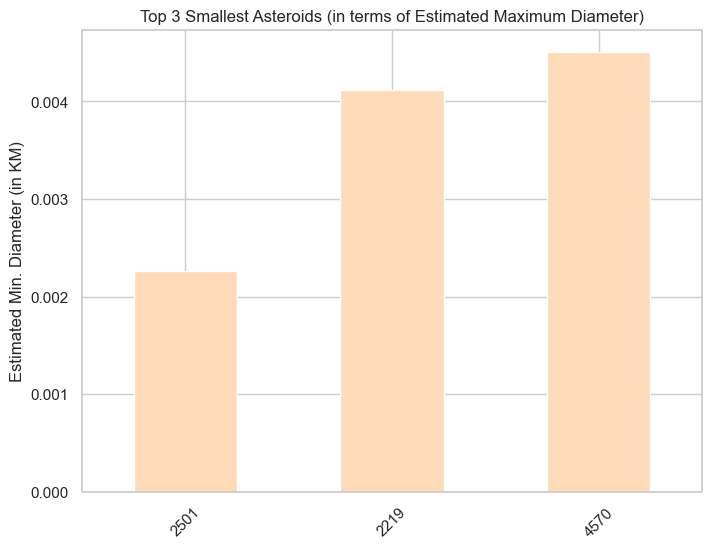

In [229]:
eda_maxS['Est Dia in KM(max)'].plot(kind='bar', ylabel='Estimated Min. Diameter (in KM)', color='peachpuff')
plt.title('Top 3 Smallest Asteroids (in terms of Estimated Maximum Diameter)')
plt.xticks(rotation=45)
plt.show()

In [230]:
# Top 3 Fastest Asteroids
eda_rvL = asteriods.sort_values('Relative Velocity km per hr', ascending=False).head(3)
eda_rvL

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
3402,3755203,3755203,19.5,0.334622,0.748238,334.622374,748.238376,0.207925,0.464934,1097.842471,...,315.875024,507.717896,0.161537,146.140262,2.329495,2458193.228,223.345080,0.709055,J2000,True
1916,2040267,2040267,15.5,2.111324,4.721065,2111.324448,4721.064988,1.311916,2.933533,6926.917702,...,148.252788,565.759854,0.256497,211.916403,2.420939,2458280.001,182.150152,0.636312,J2000,False
463,2194268,2194268,18.2,0.608913,1.361570,608.912622,1361.570015,0.378361,0.846040,1997.744887,...,160.800897,639.709856,0.308923,107.692934,2.597016,2457909.672,51.113964,0.562755,J2000,True


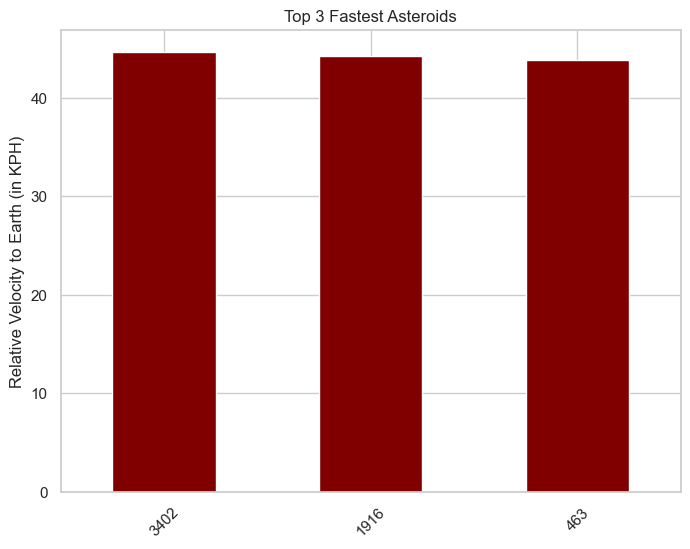

In [231]:
eda_rvL['Relative Velocity km per sec'].plot(kind='bar', ylabel='Relative Velocity to Earth (in KPH)', color='maroon')
plt.title('Top 3 Fastest Asteroids')
plt.xticks(rotation=45)
plt.show()

In [232]:
# Top 3 Dimmest Asteroids
eda_amS = asteriods.sort_values('Absolute Magnitude', ascending=True).head(3)
eda_amS

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
1716,2000433,2000433,11.16,15.579552,34.836938,15579.552410,34836.938250,9.680682,21.646663,51114.01874,...,304.322163,642.995474,1.133419,178.816591,1.782461,2457873.186,71.280278,0.559880,J2000,False
373,2001980,2001980,13.92,4.370740,9.773272,4370.740040,9773.271842,2.715851,6.072828,14339.69875,...,246.574315,816.359387,1.085815,115.485874,2.333076,2458071.714,328.595687,0.440982,J2000,False
4467,2001685,2001685,14.23,3.789265,8.473054,3789.264984,8473.054089,2.354539,5.264910,12431.97213,...,274.341995,583.865635,0.771233,127.072787,1.963026,2454441.626,18.419869,0.616580,J2000,False


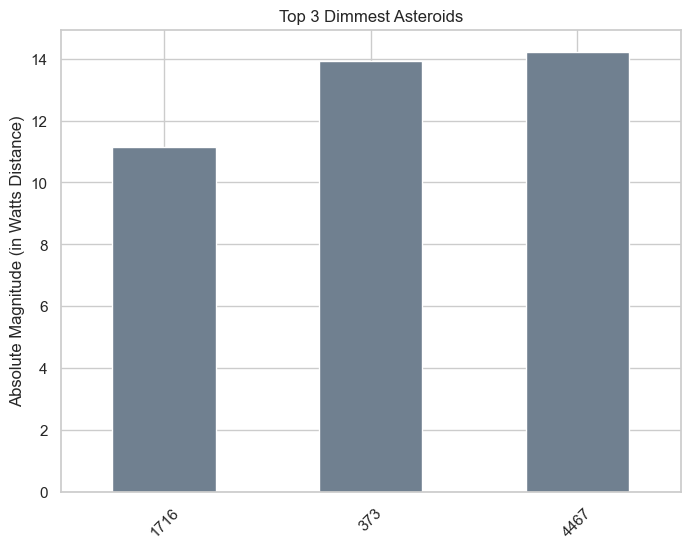

In [233]:
eda_amS['Absolute Magnitude'].plot(kind='bar', ylabel='Absolute Magnitude (in Watts Distance)', color='slategray')
plt.title('Top 3 Dimmest Asteroids')
plt.xticks(rotation=45)
plt.show()

### Remove Outliers

In [234]:
## storing names of columns in Column_Names
Column_Names=['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Relative Velocity km per hr',
       'Miss Dist.(kilometers)', 'Absolute Magnitude']
for j in Column_Names:
  asteriod['zscore'] = (asteriod[j] - asteriod[j].mean())/asteriod[j].std()
  asteriod.loc[((asteriod.zscore>2) | (asteriod.zscore<-2)), j] = np.nan

asteriod = asteriod.drop('zscore', axis=1)
asteriod

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,True
1,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,False
2,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,True
3,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173875,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,False
4,21.600,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,22.154265,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2457708.228,304.306024,0.787436,False
4683,NaN,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,3.225150,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2458087.617,282.978786,0.884117,False
4684,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501181,562.373736,7.191642,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2458300.480,203.501147,0.521698,False
4685,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,851.187094,11.352090,...,21.080244,163.802909,662.048343,1.185467,180.346090,1.787733,2458288.261,203.524965,0.543767,False


In [235]:
asteriod.isnull().sum()

Absolute Magnitude              155
Est Dia in KM(min)              131
Est Dia in KM(max)              131
Est Dia in M(min)                 0
Est Dia in M(max)                 0
Est Dia in Miles(min)             0
Est Dia in Miles(max)             0
Est Dia in Feet(min)              0
Est Dia in Feet(max)              0
Relative Velocity km per sec      0
Relative Velocity km per hr     208
Miles per hour                    0
Miss Dist.(Astronomical)          0
Miss Dist.(lunar)                 0
Miss Dist.(kilometers)            0
Miss Dist.(miles)                 0
Orbit Uncertainity                0
Minimum Orbit Intersection        0
Jupiter Tisserand Invariant       0
Epoch Osculation                  0
Eccentricity                      0
Semi Major Axis                   0
Inclination                       0
Asc Node Longitude                0
Orbital Period                    0
Perihelion Distance               0
Perihelion Arg                    0
Aphelion Dist               

### Null-Value Imputation

In [236]:
imputer = KNNImputer(n_neighbors=2)
asteriod = pd.DataFrame(imputer.fit_transform(asteriod), columns = asteriod.columns)

In [237]:
asteriod.isnull().sum()

Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Time                 0
Mean Anomaly  

### Feature Selection

In [238]:
asteriod.columns

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)',
       'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous'],
      dtype='object')

In [239]:
# Feature Selection
features =['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Relative Velocity km per hr',
       'Miss Dist.(kilometers)', 'Absolute Magnitude']
label = ['Hazardous']

In [240]:
X = asteriod.loc[:, features]
y = asteriod.loc[:, label]

### Handling Imbalanced Data: Upsampling

In [241]:
asteriod['Hazardous'].value_counts()

Hazardous
0.0    3932
1.0     755
Name: count, dtype: int64

In [242]:
oversample = SMOTE()
X_upsampled, y_upsampled = oversample.fit_resample(X, y)

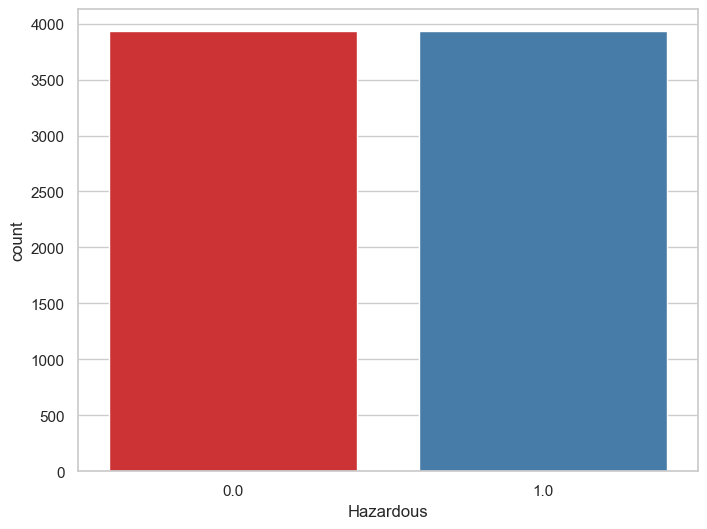

In [243]:
plt.rcParams['figure.figsize']=[8,6]
sns.countplot(x='Hazardous',data=y_upsampled)
plt.show()

### Split the dataset

In [244]:

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                random_state=0,train_size=0.75, stratify = y)

print(X_train.shape)
print(X_test.shape)

(3515, 5)
(1172, 5)


In [245]:

X_train_upsampled,X_test_upsampled,y_train_upsampled,y_test_upsampled = train_test_split(X_upsampled,y_upsampled,
                                                                                         random_state=0,train_size=0.75, stratify = y_upsampled)

print(X_train_upsampled.shape)
print(X_test_upsampled.shape)

(5898, 5)
(1966, 5)


### Scale Dataset

In [246]:
scaler = StandardScaler()
train_scaled=pd.DataFrame(scaler.fit_transform(X_train)) # Scaling the train set
test_scaled=pd.DataFrame(scaler.transform(X_test)) # Scaling the test set

print(X_train)

      Est Dia in KM(min)  Est Dia in KM(max)  Relative Velocity km per hr   
4648            0.008801            0.019681                 31653.548350  \
92              0.088934            0.198861                 73050.477280   
2038            0.637610            1.425739                102103.228200   
2809            0.242412            0.542051                 83859.341540   
1775            0.319562            0.714562                 88118.854565   
...                  ...                 ...                          ...   
614             0.421265            0.941976                 41950.197720   
1917            0.013322            0.029788                 55557.150730   
4343            0.035039            0.078350                 36555.767860   
2739            0.011603            0.025944                 91222.847940   
4218            0.009651            0.021579                 22906.767210   

      Miss Dist.(kilometers)  Absolute Magnitude  
4648            7.387493

In [247]:
scaler = StandardScaler()
train_scaled_upsampled = pd.DataFrame(scaler.fit_transform(X_train_upsampled)) # Scaling the train set
test_scaled_upsampled = pd.DataFrame(scaler.transform(X_test_upsampled)) # Scaling the test set

print(X_train_upsampled)

      Est Dia in KM(min)  Est Dia in KM(max)  Relative Velocity km per hr   
7338            0.220148            0.492265                 61927.122130  \
1245            0.042126            0.094198                 40545.833370   
6115            0.607626            1.358694                 64573.487513   
7002            0.141696            0.316843                 32078.537940   
5005            0.163711            0.366068                 41481.192755   
...                  ...                 ...                          ...   
5362            0.162039            0.362330                 87144.837256   
5318            0.447460            1.000550                 62215.631228   
521             0.175612            0.392681                 40073.430490   
1511            0.192555            0.430566                 53704.564280   
4104            0.008405            0.018795                 23125.636350   

      Miss Dist.(kilometers)  Absolute Magnitude  
7338            3.051808

# ***Apply ML Models***

In [249]:
def printOutcome(outcomes):
  print('Accuracy of predictions on Train set:',round(outcomes[0][0]*100,2),'%')
  print('Accuracy of predictions on Test set:',round(outcomes[0][1]*100,2),'%')
  print()

  print('Precision of predictions on Train set:',round(outcomes[1][0]*100,2),'%')
  print('Precision of predictions on Test set:',round(outcomes[1][1]*100,2),'%')
  print()

  print('Recall of predictions on Train set:',round(outcomes[2][0]*100,2),'%')
  print('Recall of predictions on Test set:',round(outcomes[2][1]*100,2),'%')
  print()

  print('f1 score of predictions on Train set:',round(outcomes[3][0]*100,2),'%')
  print('f1 score of predictions on Test set:',round(outcomes[3][1]*100,2),'%')
  print()

In [250]:
outcomeData = []
def outcomeCalc(predict_train, predict_test, Y_train, Y_test):
  modelOutcome = []

  # Accuracy Calculation
  acc_train=accuracy_score(Y_train,predict_train)
  acc_test=accuracy_score(Y_test,predict_test)
  modelOutcome.append([acc_train,acc_test])

  # Precision Calculation
  precision_train=precision_score(Y_train,predict_train)
  precision_test=precision_score(Y_test,predict_test)
  modelOutcome.append([precision_train,precision_test])

  #Recall Calculation
  recall_train=recall_score(Y_train,predict_train)
  recall_test=recall_score(Y_test,predict_test)
  modelOutcome.append([recall_train,recall_test])

  # f1 Calculation
  f1_train=f1_score(Y_train,predict_train)
  f1_test=f1_score(Y_test,predict_test)
  modelOutcome.append([f1_train,f1_test])

  if modelOutcome not in outcomeData:
    outcomeData.append(modelOutcome)
  printOutcome(modelOutcome)

In [251]:
def confusionMatrix(predict_test, Y_test):
  # Calculate the confusion matrix
  conf_matrix = confusion_matrix(y_true=Y_test, y_pred=predict_test)

  #Print confusion matrix
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

## AdaBoost Classifier

### Before Resample

Accuracy of predictions on Train set: 86.54 %
Accuracy of predictions on Test set: 85.32 %

Precision of predictions on Train set: 75.98 %
Precision of predictions on Test set: 66.04 %

Recall of predictions on Train set: 24.03 %
Recall of predictions on Test set: 18.52 %

f1 score of predictions on Train set: 36.51 %
f1 score of predictions on Test set: 28.93 %



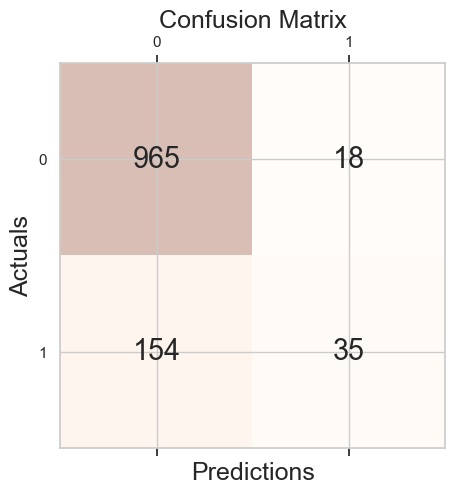

In [252]:
ADA_Model=AdaBoostClassifier(n_estimators=50, random_state=0) # Machine Instance
ADA_Model.fit(train_scaled,y_train)# Training the model

# Predictions made
predict_train=ADA_Model.predict(train_scaled)
predict_test=ADA_Model.predict(test_scaled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train, y_test)

#Confusion Matrix
confusionMatrix(predict_test, y_test)

### After Resample

Accuracy of predictions on Train set: 81.74 %
Accuracy of predictions on Test set: 80.47 %

Precision of predictions on Train set: 74.81 %
Precision of predictions on Test set: 73.68 %

Recall of predictions on Train set: 95.69 %
Recall of predictions on Test set: 94.81 %

f1 score of predictions on Train set: 83.98 %
f1 score of predictions on Test set: 82.92 %



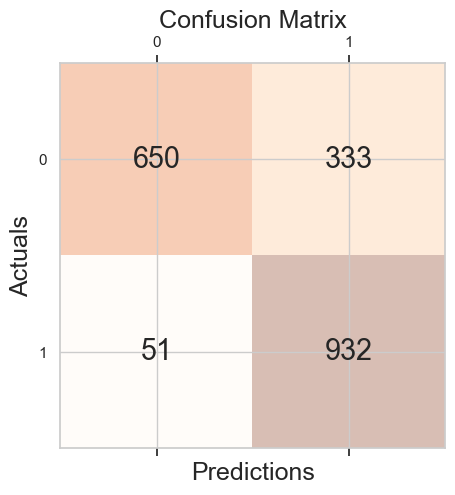

In [253]:
ADA_Model=AdaBoostClassifier(n_estimators=50, random_state=0) # Machine Instance
ADA_Model.fit(train_scaled_upsampled,y_train_upsampled)# Training the model

# Predictions made
predict_train=ADA_Model.predict(train_scaled_upsampled)
predict_test=ADA_Model.predict(test_scaled_upsampled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train_upsampled, y_test_upsampled)

#Confusion Matrix
confusionMatrix(predict_test, y_test_upsampled)

## Random Forest

### Before Resample

Accuracy of predictions on Train set: 99.94 %
Accuracy of predictions on Test set: 83.96 %

Precision of predictions on Train set: 100.0 %
Precision of predictions on Test set: 50.47 %

Recall of predictions on Train set: 99.65 %
Recall of predictions on Test set: 28.57 %

f1 score of predictions on Train set: 99.82 %
f1 score of predictions on Test set: 36.49 %



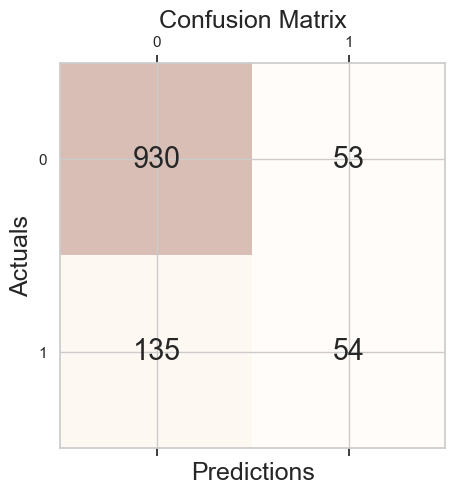

In [254]:
RF_Model = RandomForestClassifier(n_estimators = 50)  # Machine Instance
RF_Model.fit(train_scaled,y_train) # Training the model

# Predictions made
predict_train=RF_Model.predict(train_scaled)
predict_test=RF_Model.predict(test_scaled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train, y_test)

#Confusion Matrix
confusionMatrix(predict_test, y_test)

### After Resample

Accuracy of predictions on Train set: 99.98 %
Accuracy of predictions on Test set: 89.01 %

Precision of predictions on Train set: 99.97 %
Precision of predictions on Test set: 88.78 %

Recall of predictions on Train set: 100.0 %
Recall of predictions on Test set: 89.32 %

f1 score of predictions on Train set: 99.98 %
f1 score of predictions on Test set: 89.05 %



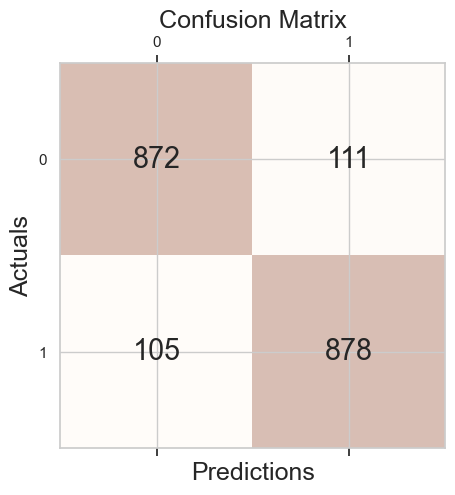

In [255]:
RF_Model = RandomForestClassifier(n_estimators = 50)  # Machine Instance
RF_Model.fit(train_scaled_upsampled,y_train_upsampled) # Training the model

# Predictions made
predict_train=RF_Model.predict(train_scaled_upsampled)
predict_test=RF_Model.predict(test_scaled_upsampled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train_upsampled, y_test_upsampled)

#Confusion Matrix
confusionMatrix(predict_test, y_test_upsampled)

## KNN

### Before Resample

Accuracy of predictions on Train set: 88.05 %
Accuracy of predictions on Test set: 83.11 %

Precision of predictions on Train set: 69.62 %
Precision of predictions on Test set: 46.28 %

Recall of predictions on Train set: 45.76 %
Recall of predictions on Test set: 29.63 %

f1 score of predictions on Train set: 55.22 %
f1 score of predictions on Test set: 36.13 %



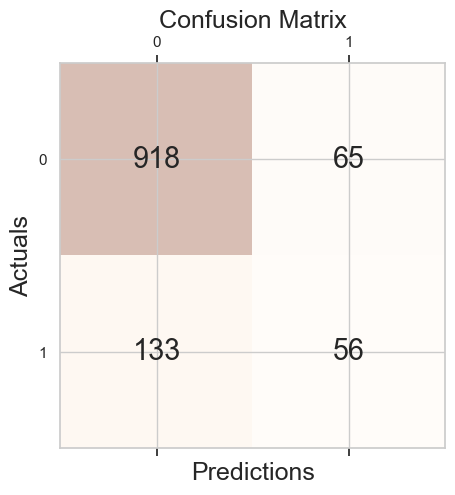

In [256]:
KNN_Model=KNeighborsClassifier() # Machine Instance
KNN_Model.fit(train_scaled,y_train) # Traing the model

# Predictions made
predict_train=KNN_Model.predict(train_scaled)
predict_test=KNN_Model.predict(test_scaled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train, y_test)

#Confusion Matrix
confusionMatrix(predict_test, y_test)

### After Resample

Accuracy of predictions on Train set: 86.67 %
Accuracy of predictions on Test set: 79.91 %

Precision of predictions on Train set: 81.87 %
Precision of predictions on Test set: 76.2 %

Recall of predictions on Train set: 94.2 %
Recall of predictions on Test set: 86.98 %

f1 score of predictions on Train set: 87.61 %
f1 score of predictions on Test set: 81.24 %



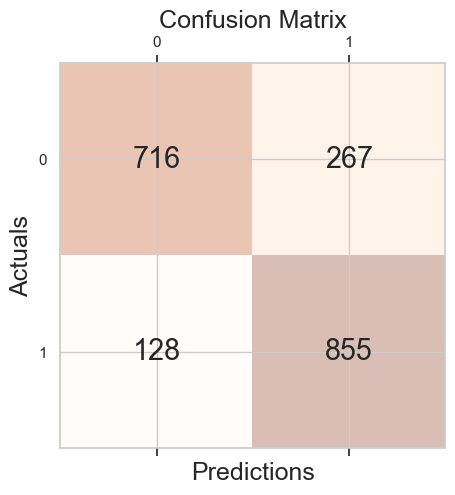

In [257]:
KNN_Model=KNeighborsClassifier() # Machine Instance
KNN_Model.fit(train_scaled_upsampled,y_train_upsampled) # Traing the model

# Predictions made
predict_train=KNN_Model.predict(train_scaled_upsampled)
predict_test=KNN_Model.predict(test_scaled_upsampled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train_upsampled, y_test_upsampled)

#Confusion Matrix
confusionMatrix(predict_test, y_test_upsampled)

## Gaussian Naive Bayes

### Before Resample

Accuracy of predictions on Train set: 74.14 %
Accuracy of predictions on Test set: 74.49 %

Precision of predictions on Train set: 28.91 %
Precision of predictions on Test set: 29.48 %

Recall of predictions on Train set: 41.52 %
Recall of predictions on Test set: 41.8 %

f1 score of predictions on Train set: 34.08 %
f1 score of predictions on Test set: 34.57 %



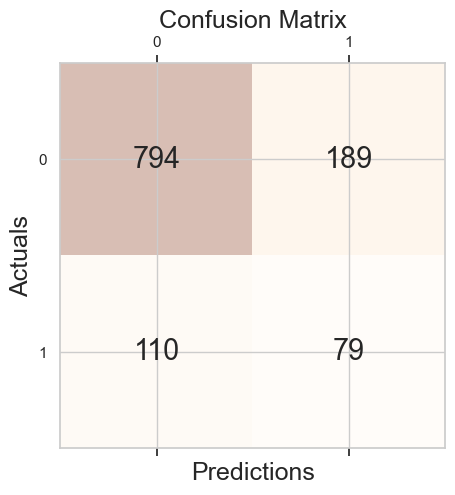

In [258]:
NB_Model=GaussianNB() # Machine Instance
NB_Model.fit(train_scaled,y_train) # Traing the model

# Predictions made
predict_train=NB_Model.predict(train_scaled)
predict_test=NB_Model.predict(test_scaled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train, y_test)

#Confusion Matrix
confusionMatrix(predict_test, y_test)

### After Resample

Accuracy of predictions on Train set: 75.77 %
Accuracy of predictions on Test set: 76.25 %

Precision of predictions on Train set: 71.98 %
Precision of predictions on Test set: 71.9 %

Recall of predictions on Train set: 84.4 %
Recall of predictions on Test set: 86.16 %

f1 score of predictions on Train set: 77.7 %
f1 score of predictions on Test set: 78.39 %



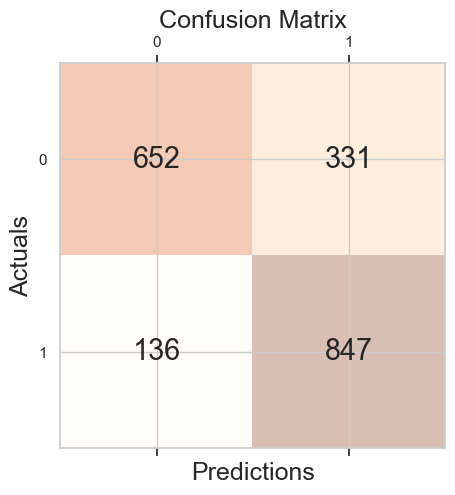

In [259]:
NB_Model=GaussianNB() # Machine Instance
NB_Model.fit(train_scaled_upsampled,y_train_upsampled) # Traing the model

# Predictions made
predict_train=NB_Model.predict(train_scaled_upsampled)
predict_test=NB_Model.predict(test_scaled_upsampled)

#Generate Outcomes
outcomeCalc(predict_train, predict_test, y_train_upsampled, y_test_upsampled)

#Confusion Matrix
confusionMatrix(predict_test, y_test_upsampled)

# ***Performance Visualization***

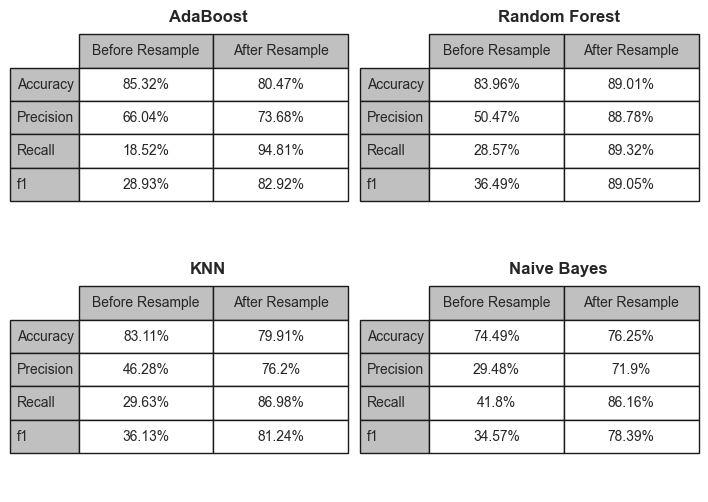

In [260]:
fig, ax = plt.subplots(2,2)
plt.rcParams['figure.figsize']=[12,5]
plt.subplots_adjust(wspace = 0.3, hspace = 0.2)
title = ['AdaBoost', 'Random Forest', 'KNN', 'Naive Bayes']
counter = 0
data = []

for lst in range(0,len(outcomeData),2):
  temp = []
  for item in range(4):
    temp.append([outcomeData[lst][item][1], outcomeData[lst+1][item][1]])
  data.append(temp)

for j in range(2):
  for k in range(2):
    colNames = [i for i in ['Before Resample', 'After Resample']]
    rowNames = [i for i in ['Accuracy', 'Precision', 'Recall', 'f1']]
    cellValues = [[str(round(c*100,2))+'%' for c in r] for r in data[counter]]

    ax[j,k].set_axis_off()
    ax[j,k].axis('tight')
    table = ax[j,k].table(
        cellText = cellValues,
        rowLabels = rowNames,
        colLabels = colNames,
        rowColours =["silver"] * 4,
        colColours =["silver"] * 2,
        cellLoc ='center',
        loc ='upper left')
    table.scale(1, 2)
    ax[j,k].set_title(title[counter],
                fontweight ="bold")
    counter += 1

plt.show()

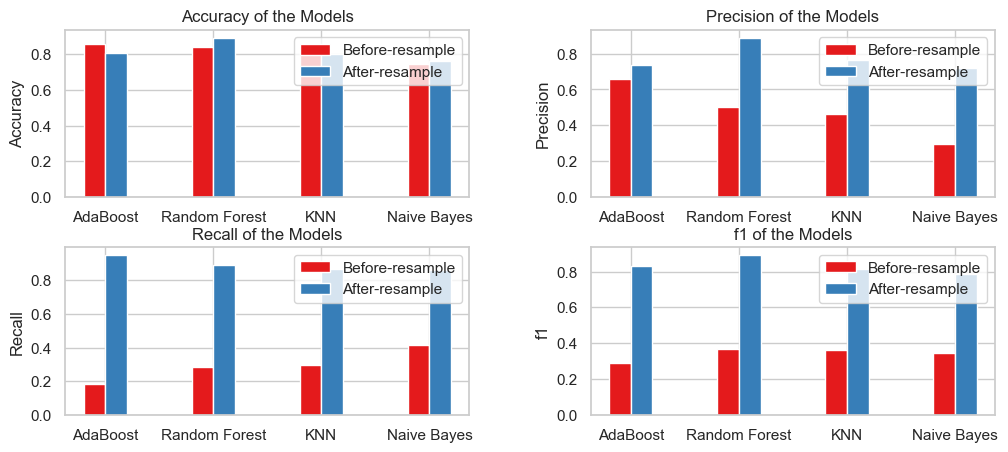

In [261]:
dataBarBefore = []
dataBarAfter = []

for i in range(4):
  temp1 = []
  temp2 = []
  for j in range(4):
    temp1.append(data[j][i][0])
    temp2.append(data[j][i][1])
  dataBarBefore.append(temp1)
  dataBarAfter.append(temp2)


models = ['AdaBoost', 'Random Forest', 'KNN', 'Naive Bayes']
outcomeLabel = ['Accuracy', 'Precision', 'Recall', 'f1']
fig, ax = plt.subplots(2,2)
plt.rcParams['figure.figsize']=[20,12]
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
counter = 0

for i in range(2):
  for j in range(2):
    x = np.arange(len(models))  # the label locations
    width = 0.2  # the width of the bars

    rects1 = ax[i,j].bar(x - width/2, dataBarBefore[counter], width, label='Before-resample')
    rects2 = ax[i,j].bar(x + width/2, dataBarAfter[counter], width, label='After-resample')

    ax[i,j].set_ylabel(outcomeLabel[counter])
    ax[i,j].set_title(outcomeLabel[counter] + " of the Models")
    ax[i,j].set_xticks(x)
    ax[i,j].set_xticklabels(models)
    ax[i,j].legend()
    counter += 1

plt.show()

In [262]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\nasa - nasa.csv")

# Selecting relevant columns
X = data[['Est Dia in Feet(max)', 'Relative Velocity km per hr']]
y = data['Hazardous']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Model training
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

# Function to predict hazardousness
def predict_hazardousness(diameter_ft, velocity_km_hr):
    input_features_scaled = scaler.transform([[diameter_ft, velocity_km_hr]])
    prediction = model.predict(input_features_scaled)
    return prediction[0]

# User interaction
print("Enter the asteroid's diameter and relative velocity to determine if it is hazardous.")

# Getting user input
try:
    diameter_ft = float(input("Enter asteroid diameter in feet: "))
    velocity_km_hr = float(input("Enter relative velocity in kilometers per hour: "))
except ValueError:
    print("Please enter valid numeric values for the diameter and velocity.")
    exit()

# Predict hazardousness
prediction = predict_hazardousness(diameter_ft, velocity_km_hr)
if prediction == 1:
    print("The asteroid is hazardous.")
else:
    print("The asteroid is not hazardous.")


Enter the asteroid's diameter and relative velocity to determine if it is hazardous.


The asteroid is not hazardous.
